# Linear Regression CaseStudy

## To explore the factors which have an impact on the Temperature in Hungary

• time
• summary
• precipType
• temperature
• apparentTemperature
• humidity
• windSpeed
• windBearing
• visibility
• loudCover
• pressure

## Weather in Szeged 2006-2016
### hourly/daily summary for Szeged, Hungary area, between 2006 and 2016

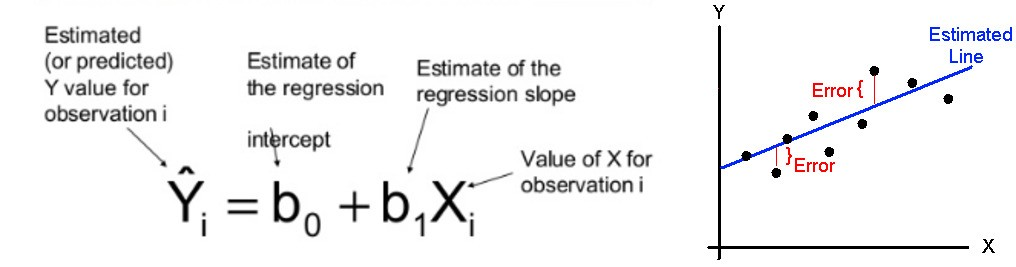

### Import the libraries

In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [7]:
os.chdir(r"G:\Ivy Pro Data Science, AI and Machine L\PYTHON\02LINEAR_REGRESSION\Case_2")
path_data = os.getcwd()

In [8]:
df = pd.read_csv("weatherHistory.csv")

In [9]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Exploratory Data Analysis

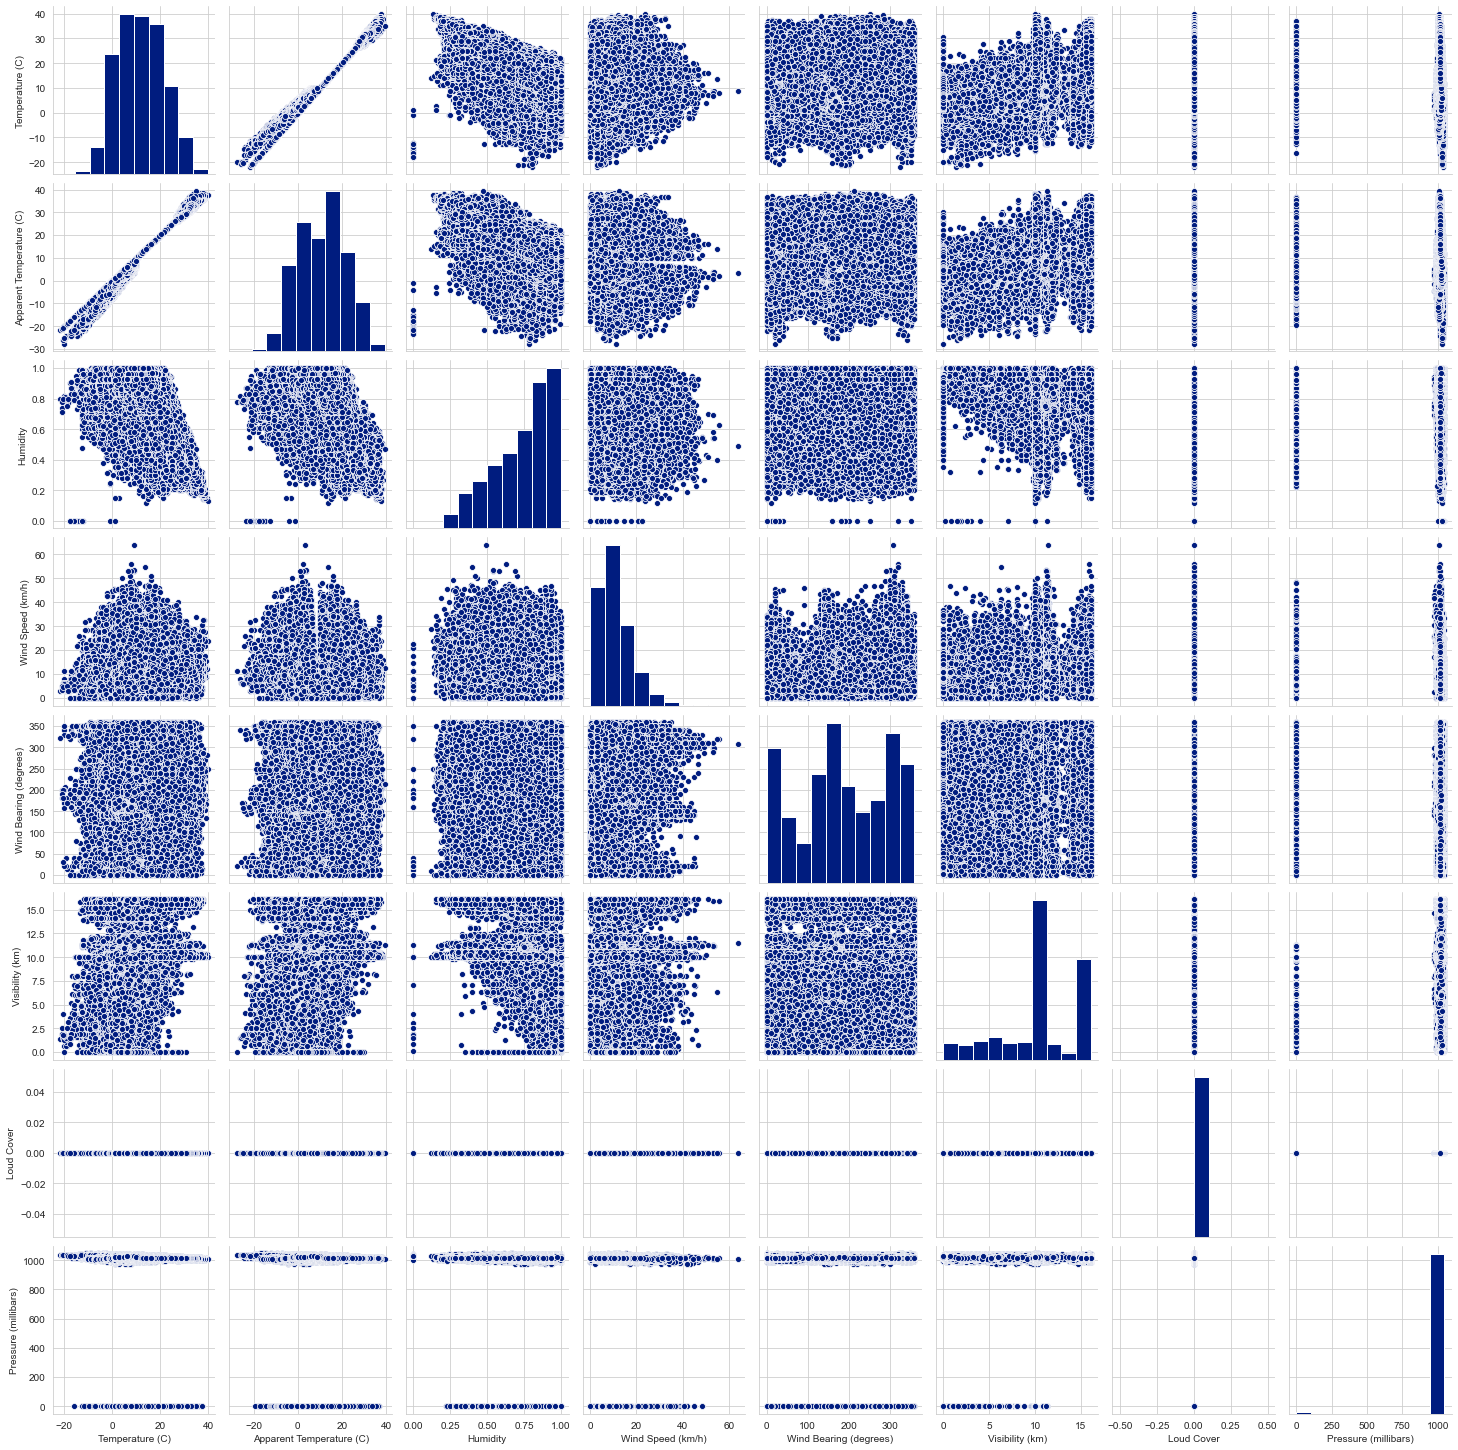

In [10]:
sns.set_palette("dark")
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

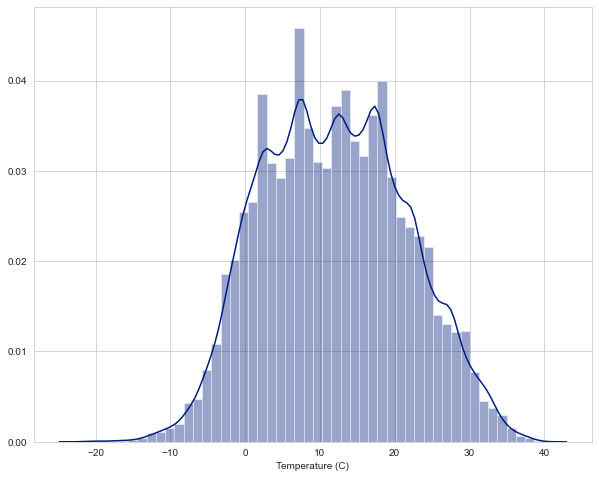

In [11]:
# Density distribution for target variable
plt.figure(figsize=(10,8))
sns.distplot(df['Temperature (C)'])
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [14]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [15]:
# For both numerical and categorical variables
df.describe(include="all")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 09:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [16]:
df.shape

(96453, 12)

In [17]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

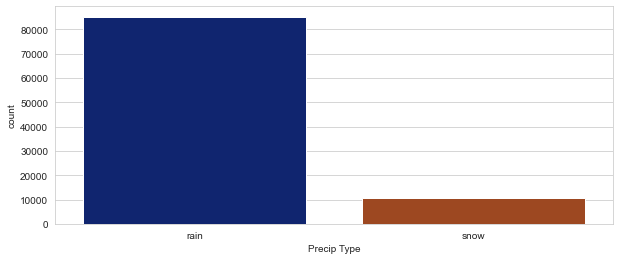

In [18]:
#Precip Type distribution
plt.subplots(figsize=(10,4))
sns.countplot(df['Precip Type'])

In [19]:
#checking for null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [20]:
percent = (df.isnull().sum()/df.isnull().count())
percent
# 0.5% data missing

Formatted Date              0.00000
Summary                     0.00000
Precip Type                 0.00536
Temperature (C)             0.00000
Apparent Temperature (C)    0.00000
Humidity                    0.00000
Wind Speed (km/h)           0.00000
Wind Bearing (degrees)      0.00000
Visibility (km)             0.00000
Loud Cover                  0.00000
Pressure (millibars)        0.00000
Daily Summary               0.00000
dtype: float64

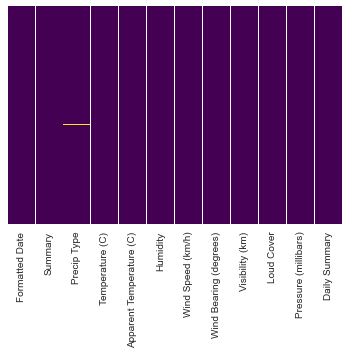

In [21]:
# to see missing value using visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Outliers Check

#### For Outliers if it is Gaussian Distribution, then we will go be standard deviation
#### If it is not a Gaussian Distribution, we will go by IQR approach

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1800216a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d180021d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d180021340>],
 'medians': [<matplotlib.lines.Line2D at 0x1d180052460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d180052760>],
 'means': []}

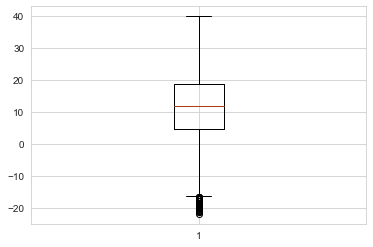

In [22]:
plt.boxplot(df['Temperature (C)'])

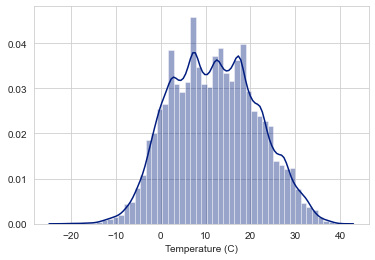

In [23]:
sns.distplot(df['Temperature (C)'])

#### The varible Temperature (C) can be seen as gaussian distribution

In [24]:
upper_bound = df['Temperature (C)'].mean() + 3*df['Temperature (C)'].std()
lower_bound = df['Temperature (C)'].mean() - 3*df['Temperature (C)'].std()

In [25]:
print(upper_bound)
print(lower_bound)

40.587317399482636
-16.7219605244589


{'whiskers': [<matplotlib.lines.Line2D at 0x1d180152910>,
 'caps': [<matplotlib.lines.Line2D at 0x1d18015d970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d180152c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d180182070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d180182370>],
 'means': []}

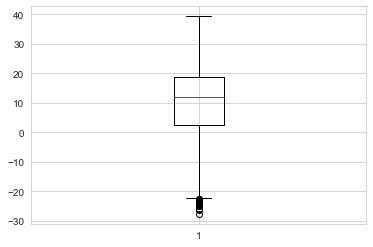

In [26]:
plt.boxplot(df['Apparent Temperature (C)'])

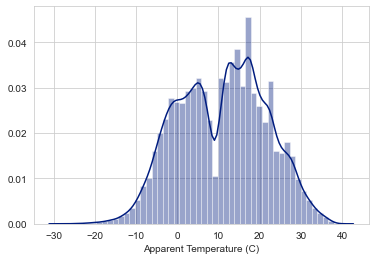

In [27]:
sns.distplot(df['Apparent Temperature (C)'])

#### The varible Apparent Temperature (C) can be seen as gaussian distribution

In [28]:
upper_bound = df['Apparent Temperature (C)'].mean() + 3 * df['Apparent Temperature (C)'].std()
lower_bound = df['Apparent Temperature (C)'].mean() - 3 * df['Apparent Temperature (C)'].std()

In [29]:
print(upper_bound)
print(lower_bound)

42.945571050524514
-21.23551330219106


{'whiskers': [<matplotlib.lines.Line2D at 0x1d180263640>,
 'caps': [<matplotlib.lines.Line2D at 0x1d180288250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d180274d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d180288910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d180288c10>],
 'means': []}

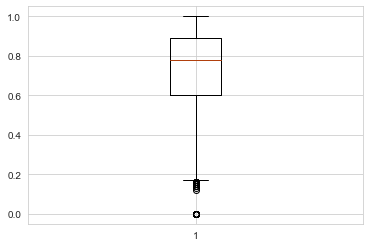

In [30]:
plt.boxplot(df['Humidity'])

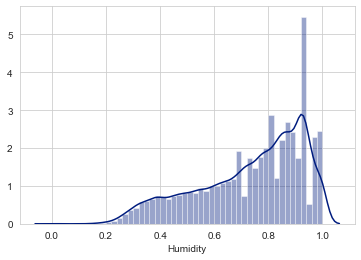

In [31]:
sns.distplot(df['Humidity'])

#### the variable Humidity is not a gaussian distribution

In [32]:
IQR = df['Humidity'].quantile(0.75) - df['Humidity'].quantile(0.25)
print('IQR:',IQR)

IQR: 0.29000000000000004


In [33]:
Upper_bound = df['Humidity'].quantile(0.75) + (1.5 * IQR)
lower_bound = df['Humidity'].quantile(0.25) - (1.5 * IQR)

In [34]:
print(Upper_bound)
print(lower_bound)

1.3250000000000002
0.16499999999999992


{'whiskers': [<matplotlib.lines.Line2D at 0x1d1803acd60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1803aa520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1803acb20>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1803cf340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1803cf640>],
 'means': []}

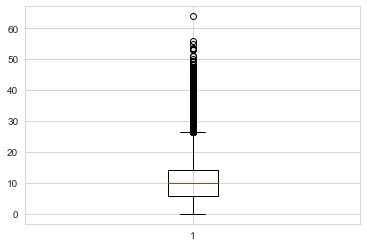

In [35]:
plt.boxplot(df['Wind Speed (km/h)'])

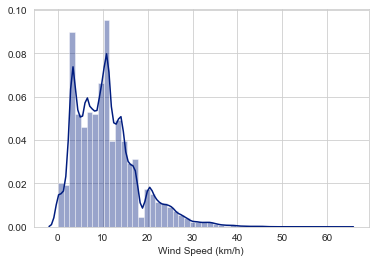

In [36]:
sns.distplot(df['Wind Speed (km/h)'])

#### the variable Wind Speed (km/h) is not a gaussian distribution

In [37]:
IQR = df['Wind Speed (km/h)'].quantile(0.75) - df['Wind Speed (km/h)'].quantile(0.25)
print('IQR:',IQR)

IQR: 8.307599999999997


In [38]:
Upper_bound = df['Wind Speed (km/h)'].quantile(0.75) + (1.5 * IQR)
lower_bound = df['Wind Speed (km/h)'].quantile(0.25) - (1.5 * IQR)

In [39]:
print(Upper_bound)
print(lower_bound)

26.597199999999994
-6.633199999999994


{'whiskers': [<matplotlib.lines.Line2D at 0x1d1803f6280>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1803a0730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d18049e400>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1801526d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f7fe60d0>],
 'means': []}

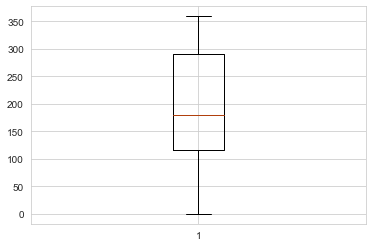

In [40]:
plt.boxplot(df['Wind Bearing (degrees)'])
# No outlier found in this

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f7cf94f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f7ca4730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f7cb28e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f7ca4b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f7ce8bb0>],
 'means': []}

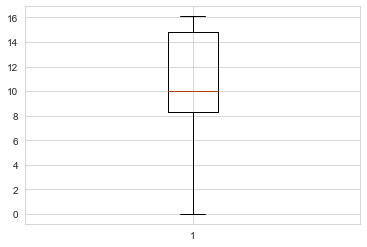

In [41]:
plt.boxplot(df['Visibility (km)'])
# No outlier found in this

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f54d48e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f54d4dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f54d42e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f60c9100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f60c90d0>],
 'means': []}

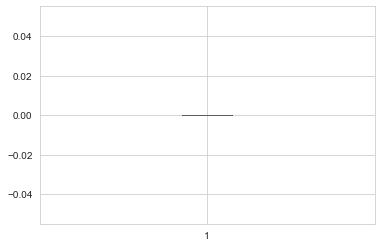

In [42]:
plt.boxplot(df['Loud Cover'])
# No outlier found in this

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f6319a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f6319d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f6319b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f7920f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f7920100>],
 'means': []}

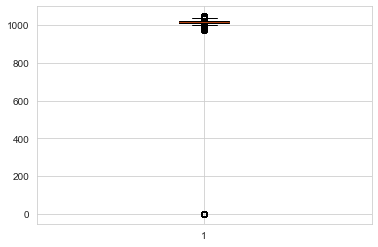

In [43]:
plt.boxplot(df['Pressure (millibars)'])

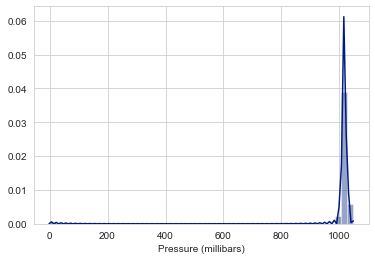

In [44]:
sns.distplot(df['Pressure (millibars)'])

In [45]:
upper_bound = df['Pressure (millibars)'].mean() + 3 * df['Pressure (millibars)'].std()
lower_bound = df['Pressure (millibars)'].mean() - 3 * df['Pressure (millibars)'].std()

In [46]:
print(upper_bound)
print(lower_bound)

1354.145672901905
652.3262388064162


#### Handling the outliers

In [47]:
df.loc[df["Temperature (C)"] < -16.72, "Temperature (C)"] = -16.72

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f76a1d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f76eb370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f76a1190>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f76eb100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f76ebac0>],
 'means': []}

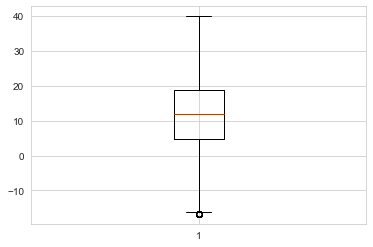

In [48]:
plt.boxplot(df['Temperature (C)'])

In [49]:
df.loc[df["Humidity"] < 0.164, "Humidity"] = 0.164

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f7725130>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f7725ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f7725a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f60fadf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f60fa940>],
 'means': []}

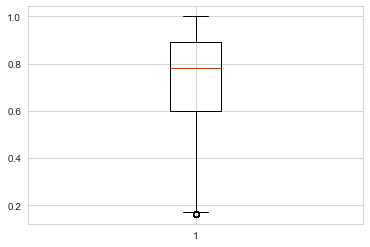

In [50]:
plt.boxplot(df['Humidity'])

In [51]:
df.loc[df["Apparent Temperature (C)"] < -21.2 , "Apparent Temperature (C)"] =  -21.2

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f75e3340>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f75e3580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f75e30d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f5f8fb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f5f8f160>],
 'means': []}

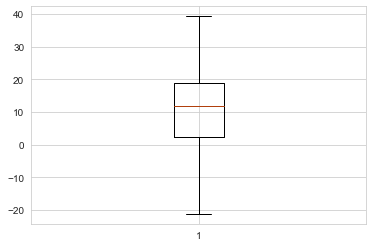

In [52]:
plt.boxplot(df['Apparent Temperature (C)'])

In [53]:
df.loc[df["Wind Speed (km/h)"] > 26.5, "Wind Speed (km/h)"] = 26.5

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f60ac430>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f7f81880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f60ac6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f7f81790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f7f81fd0>],
 'means': []}

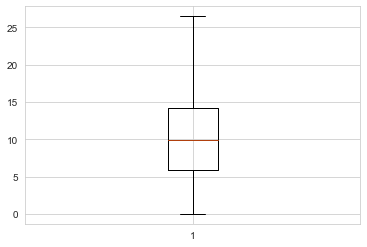

In [54]:
plt.boxplot(df['Wind Speed (km/h)'])

In [55]:
df.loc[df["Pressure (millibars)"] < 652.4,"Pressure (millibars)"] = 652.4

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f5fb1370>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f5fb1df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f5fb14f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f5f819d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f5f81a60>],
 'means': []}

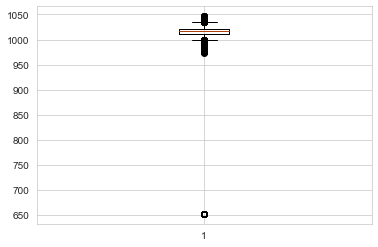

In [56]:
plt.boxplot(df['Pressure (millibars)'])

In [57]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [58]:
#Most occuring value/mode is 'rain'
#So filling the missing values with rain

df["Precip Type"] = df["Precip Type"].fillna('rain')

In [59]:
# now checking missing values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [61]:
#creating dummies for categorical variables

In [62]:
X_Dummies = pd.get_dummies(df["Precip Type"], prefix="Precip Type",prefix_sep = "_")

In [63]:
X_Dummies.head()

,Precip Type_rain,Precip Type_snow
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [64]:
df = pd.concat([df,X_Dummies],axis=1)

In [65]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1,0


In [66]:
df = df.drop(["Precip Type"],axis=1)

In [67]:
df.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1,0


In [73]:
# Correlation Matrix
df.iloc[:,[0,2,3,4,5,6,7,9,11,12]].corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
Temperature (C),1.000000,0.992652,-0.633350,0.015442,0.029995,0.392771,-0.041252,0.562523,-0.562523
Apparent Temperature (C),0.992652,1.000000,-0.603616,-0.050812,0.029005,0.381696,-0.033546,0.565130,-0.565130
Humidity,-0.633350,-0.603616,1.000000,-0.230628,0.000592,-0.369596,0.010005,-0.232782,0.232782
Wind Speed (km/h),0.015442,-0.050812,-0.230628,1.000000,0.099943,0.105185,-0.075718,0.070080,-0.070080
Wind Bearing (degrees),0.029995,0.029005,0.000592,0.099943,1.000000,0.047594,-0.020593,0.041984,-0.041984
Visibility (km),0.392771,0.381696,-0.369596,0.105185,0.047594,1.000000,0.039725,0.312875,-0.312875
Pressure (millibars),-0.041252,-0.033546,0.010005,-0.075718,-0.020593,0.039725,1.000000,-0.043474,0.043474
Precip Type_rain,0.562523,0.565130,-0.232782,0.070080,0.041984,0.312875,-0.043474,1.000000,-1.000000
Precip Type_snow,-0.562523,-0.565130,0.232782,-0.070080,-0.041984,-0.312875,0.043474,-1.000000,1.000000


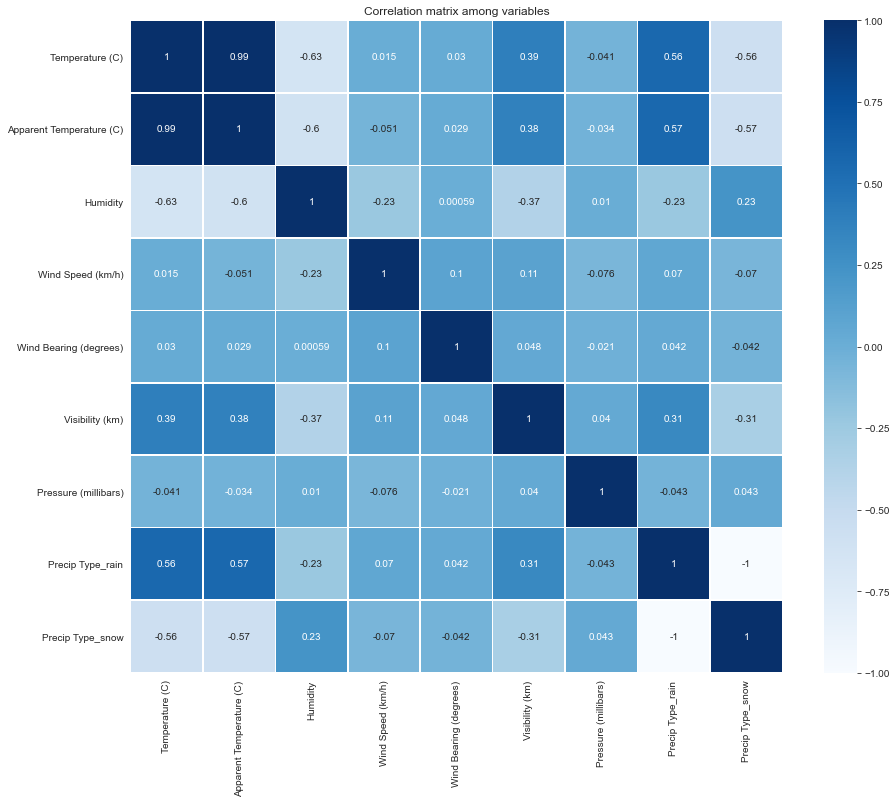

In [74]:
# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.iloc[:,[0,2,3,4,5,6,7,9,11,12]].corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

In [75]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [76]:
labelencoder = LabelEncoder()

In [77]:
df.iloc[:, 1] = labelencoder.fit_transform(df.iloc[:, 1])

In [78]:
df['Summary'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [79]:
from datetime import datetime

df["Formatted Date"]= pd.to_datetime(df["Formatted Date"],utc=True)

In [80]:
# we will drop the variable Formatted Date
df.drop(['Formatted Date'], axis = 1, inplace = True)

In [81]:
df['Loud Cover'].unique()

array([0.])

In [82]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [83]:
# Loud Cover is garbage column and Daily Summary has too many unique values

In [84]:
df.drop(['Loud Cover', 'Daily Summary'], axis = 1, inplace = True)

In [85]:
df.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,19,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1,0
1,19,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1,0
2,17,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1,0
3,19,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1,0
4,17,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1,0


#### Creating the Independendent and Dependent Data Sets

In [86]:
# Feature or Independent variables
X = df.drop(["Temperature (C)"],axis = 1)

In [87]:
X

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,19,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1,0
1,19,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1,0
2,17,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1,0
3,19,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1,0
4,17,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1,0
...,...,...,...,...,...,...,...,...,...
96448,19,26.016667,0.43,10.9963,31.0,16.1000,1014.36,1,0
96449,19,24.583333,0.48,10.0947,20.0,15.5526,1015.16,1,0
96450,19,22.038889,0.56,8.9838,30.0,16.1000,1015.66,1,0
96451,19,21.522222,0.60,10.5294,20.0,16.1000,1015.95,1,0


In [88]:
# Label or Dependent variable
y = df["Temperature (C)"]

In [89]:
y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

### Model Building

In [90]:
# Splitting the dataset into the Training set and Test set

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [92]:
X_train.head()

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
66953,18,-3.488889,0.92,10.8514,171.0,4.8783,1012.90,1,0
19495,12,-6.200000,0.92,1.8515,30.0,2.5921,1035.96,0,1
12011,17,7.272222,0.73,2.5599,142.0,10.0464,1022.16,1,0
64322,12,-0.488889,1.00,3.2039,171.0,1.5295,1009.90,0,1
81074,18,3.866667,0.93,4.7173,69.0,4.8461,1038.83,1,0


In [93]:
X_test.head()

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
6119,17,14.422222,0.93,3.5581,273.0,15.8263,1013.12,1,0
51443,17,12.155556,0.72,16.0678,329.0,11.2700,1021.10,1,0
18754,17,23.961111,0.61,7.5831,9.0,9.9820,1018.37,1,0
34070,17,15.000000,0.87,8.0500,70.0,3.5420,1019.00,1,0
26082,17,12.800000,0.77,5.0876,28.0,9.9820,1026.67,1,0


In [94]:
y_train.head()

66953    0.022222
19495   -6.200000
12011    7.272222
64322   -0.488889
81074    3.866667
Name: Temperature (C), dtype: float64

In [95]:
y_test.head()

6119     14.422222
51443    12.155556
18754    23.961111
34070    15.000000
26082    12.800000
Name: Temperature (C), dtype: float64

In [96]:
# Fitting Multiple Linear Regression to the Training set

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Prediction of the Model

In [103]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [104]:
y_pred

array([14.17245162, 13.49647541, 23.3386211 , ...,  0.72595527,
        8.03784847, 16.28237353])

#### Plotting the results

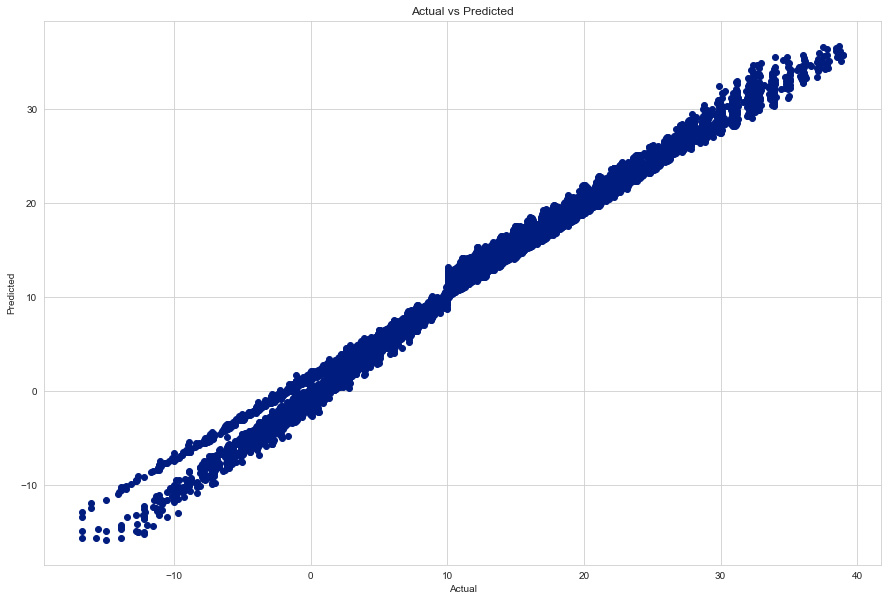

In [105]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [106]:
# Interpretation of actual, predicted and their difference 

In [107]:
y_pred_df = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_pred, "Difference" : y_test - y_pred}) 

In [108]:
y_pred_df.head(10)

,Actual value,Predicted value,Difference
6119,14.422222,14.172452,0.249771
51443,12.155556,13.496475,-1.340920
18754,23.961111,23.338621,0.622490
34070,15.000000,15.113622,-0.113622
26082,12.800000,13.138845,-0.338845
75095,11.088889,11.607233,-0.518345
29781,0.555556,-0.078981,0.634537
68559,12.733333,13.523960,-0.790626
71611,27.222222,26.636426,0.585796
62588,20.211111,19.428311,0.782800


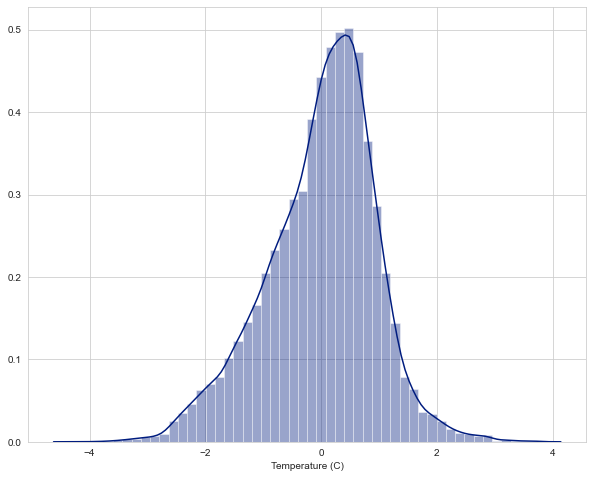

In [109]:
# Now we can see the normally distributed graph 
plt.figure(figsize=(10,8))
sns.distplot((y_test-y_pred),bins=50)
plt.show()

In [110]:
# r-square score on train data
regressor.score(X_train,y_train)

0.9902802628275749

In [111]:
# r-square score on test data
regressor.score(X_test,y_test)

0.9901878259997319

In [112]:
from sklearn import metrics

In [113]:
#Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.7366006804346709


In [114]:
#Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 0.889320741348741


In [115]:
#Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.9430380381239883


### Model Statistics

In [116]:
import statsmodels.api as sm

In [117]:
#Adding Intercept term to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [118]:
#Converting into Dataframe
X_train_d = pd.DataFrame(X_train)

In [119]:
#Printing the Model Statistics
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.826e+05
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:44:23   Log-Likelihood:            -1.0489e+05
No. Observations:               77162   AIC:                         2.098e+05
Df Residuals:                   77153   BIC:                         2.099e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.3755      0.058     41.020      0.000       2.262       2.489
Summary                      0.0035      0.001      4.401      0.000       0.002       0.005
Apparent Temperature (C)     0.8732      0.001   1733.277      0.000       0.872       0.874
Humidity                    -1.3893      0.024    -57.623      0.000      -1.437      -1.342
Wind Speed (km/h)            0.0863      0.001    150.354      0.000       0.085       0.087
Wind Bearing (degrees)      -0.0004   3.19e-05    -11.889      0.000      -0.000      -0.000
Visibility (km)              0.0086      0.001      9.431      0.000       0.007       0.010
Pressure (millibars)        -0.0010   8.18e-05    -12.679      0.000      -0.001      -0.001
Precip Type_rain             1.1473      0.030     38.326      0.000       1.089       1.206
Precip Type_snow             1.2282      0.030     41.546      0.000       1.170       1.286
==============================================================================
Omnibus:                     2107.148   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2339.838
Skew:                          -0.391   Prob(JB):                         0.00
Kurtosis:                       3.342   Cond. No.                     6.33e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [120]:
#Checking the VIF Values

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

C:\Users\Ali\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Ali\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.0,const
1,1.0,Summary
2,2.5,Apparent Temperature (C)
3,1.9,Humidity
4,1.2,Wind Speed (km/h)
5,1.0,Wind Bearing (degrees)
6,1.3,Visibility (km)
7,1.0,Pressure (millibars)
8,inf,Precip Type_rain
9,inf,Precip Type_snow


In [123]:
#Storing Coefficients in DataFrame along with coloumn names
coefficients = pd.concat([pd.DataFrame(X_train_d.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)

In [124]:
coefficients

,0,0
0,const,0.003507
1,Summary,0.873229
2,Apparent Temperature (C),-1.389320
3,Humidity,0.086345
4,Wind Speed (km/h),-0.000379
5,Wind Bearing (degrees),0.008577
6,Visibility (km),-0.001038
7,Pressure (millibars),-0.040445
8,Precip Type_rain,0.040445
9,Precip Type_snow,NaN


In [125]:
# regression intercept
print('Intercept:' ,regressor.intercept_)

Intercept: 3.5632303782692514


############################################ CASE STUDY ##########################################################